## Relax Inc. Take-Home Challenge

Thhe  data  is  available  as  two  attached  CSV  files:

takehome_user_engagement. csv

takehome_users . csv

The  data  has  the  following  two  tables:

1]  A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the product  in  the  last  two  years.   This  table  includes:

● name:  the  user's  name

● object_id:   the  user's  id

● email:  email  address

● creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:

    ○ PERSONAL_PROJECTS:  invited  to  join  another  user's personal  workspace

    ○ GUEST_INVITE:  invited  to  an  organization  as  a  guest (limited  permissions)

    ○ ORG_INVITE:  invited  to  an  organization  (as  a  full  member)

    ○ SIGNUP:  signed  up  via  the  website

    ○ SIGNUP_GOOGLE_AUTH:  signed  up  using  Google Authentication  (using  a  Google  email  account  for  their  login id)

● creation_time:  when  they  created  their  account

● last_session_creation_time:   unix  timestamp  of  last  login

● opted_in_to_mailing_list:  whether  they  have  opted  into  receiving marketing  emails

● enabled_for_marketing_drip:  whether  they  are  on  the  regular marketing  email  drip

● org_id:   the  organization  (group  of  users)  they  belong  to

● invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).

2]  A  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day that  a  user  logged  into  the  product. Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user adoption .

### Importing Liabraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [133]:
users=pd.read_csv("takehome_users.csv",encoding='latin-1',parse_dates=True,index_col=None)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [134]:
users_eng= pd.read_csv("takehome_user_engagement.csv",parse_dates=True)
users_eng.head()


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


**Convert time stamps to datetime objects of "users_eng" table**

In [135]:
users_eng['time_stamp']=pd.to_datetime(users_eng['time_stamp'])
users_eng=users_eng.set_index('time_stamp',drop=True)
users_eng.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


**Creatin a function that will find out that which user is a adopted user (an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period )**

In [136]:
from datetime import timedelta

def label_adopted(x):    
    "takes a users input and returns whether or not they have been active within any 7-day period"
    df_temp = users_eng.loc[users_eng['user_id'] == x] #select out rows of this user
    df_temp = df_temp.resample('D').mean().dropna() #resample to show if active in a day. .mean() is just of 1
    #print(df_temp)
    adopted = 0
    for i in range(len(df_temp)-2): #loop over active days till the second to last day
        #print(i)
        if df_temp.index[i + 2] - df_temp.index[i] <= timedelta(days=7): # difference between every 1st and 3rd day
            adopted = 1
            break
        else:
            adopted = 0
    return adopted

In [137]:
#label_adopted(2)

In [138]:
#apply to user df to label users as adopted=true 
users['adopted_user'] = users['object_id'].apply(label_adopted)

In [139]:
print(sum(users['adopted_user']))
print(sum(users.adopted_user)/len(users.adopted_user)*100)

1656
13.8


In [140]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0


**Convert time stamps to datetime objects in a "user" table**

In [141]:
users['creation_time'] = pd.to_datetime(users['creation_time'])

In [142]:
users['last_session_creation_time'] = users['last_session_creation_time'].map(
    lambda data: datetime.utcfromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S') if not pd.isnull(data) else None
)
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN,0


In [143]:
users['total_usage']=users['last_session_creation_time'] -users['creation_time']
users['total_usage'] = [x.total_seconds() for x in users['total_usage']]
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,total_usage
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,11750400.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,86400.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,432000.0


**Now we will delete unnecessary columns name object_id ,creation_time ,name, email and last_session_creation_time.**

In [144]:
columns_to_be_deleted = ['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time']
users.drop(columns=columns_to_be_deleted, inplace=True)
users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,total_usage
0,GUEST_INVITE,1,0,11,10803.0,0,0.0
1,ORG_INVITE,0,0,1,316.0,1,11750400.0
2,ORG_INVITE,0,0,94,1525.0,0,0.0
3,GUEST_INVITE,0,0,1,5151.0,0,86400.0
4,GUEST_INVITE,0,0,193,5240.0,0,432000.0


In [145]:
from sklearn.preprocessing import LabelEncoder

lab_encode=LabelEncoder()
columns_to_encode = ["creation_source", "org_id","invited_by_user_id"]

for col in columns_to_encode:
    if col in users.columns:        
        users[col] = lab_encode.fit_transform(users[col])

In [146]:
users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,total_usage
0,0,1,0,11,2324,0,0.0
1,1,0,0,1,55,1,11750400.0
2,1,0,0,94,297,0,0.0
3,0,0,0,1,1103,0,86400.0
4,0,0,0,193,1126,0,432000.0


In [113]:
users.isna().sum()

creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
adopted_user                     0
total_usage                   3177
dtype: int64

In [148]:
users['total_usage']=users['total_usage'].fillna(0)
users_1=users

In [149]:
from sklearn.model_selection import train_test_split

#set up data by seperating out the labels, then split for cross validation
X = users.drop('adopted_user', axis=1)
y = users['adopted_user']

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [150]:
from sklearn.ensemble import RandomForestClassifier

#train and test classifier
rf = RandomForestClassifier(class_weight='balanced_subsample')

rf.fit(X_train, X_test)

rf.score(y_train, y_test)

0.9722222222222222

In [152]:
from sklearn.metrics import classification_report, confusion_matrix

#print out classification report and confusion matrix
y_pred = rf.predict(y_train)

print(classification_report(y_test, y_pred))

cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3407
           1       0.92      0.88      0.90       553

    accuracy                           0.97      3960
   macro avg       0.95      0.93      0.94      3960
weighted avg       0.97      0.97      0.97      3960

confusion matrix:
[[3365   42]
 [  68  485]]


In [153]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)






                      Feature  Importance
5                 total_usage    0.906011
3                      org_id    0.051034
4          invited_by_user_id    0.025956
0             creation_source    0.010582
1    opted_in_to_mailing_list    0.003513
2  enabled_for_marketing_drip    0.002903


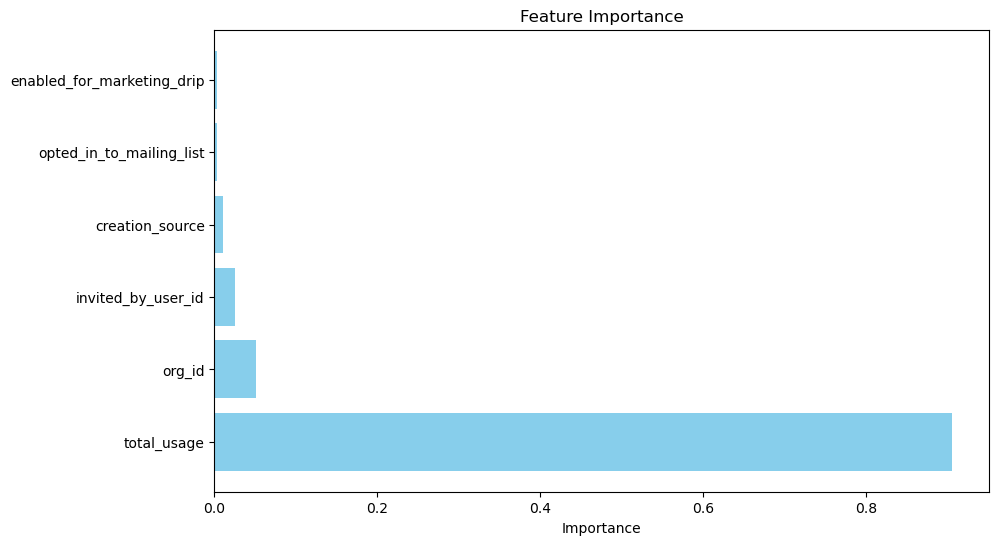

In [154]:
import matplotlib.pyplot as plt

# Assuming feature_importance_df is the DataFrame containing feature names and their importances

# Sort the DataFrame by importance in descending order (if not already sorted)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [155]:
#define func to find ecdf of dataset
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [158]:
users

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,total_usage
0,0,1,0,11,2324,0,0.0
1,1,0,0,1,55,1,11750400.0
2,1,0,0,94,297,0,0.0
3,0,0,0,1,1103,0,86400.0
4,0,0,0,193,1126,0,432000.0
...,...,...,...,...,...,...,...
11995,1,0,0,89,1801,0,0.0
11996,4,0,0,200,2564,0,432000.0
11997,0,1,1,83,1763,0,0.0
11998,2,0,0,6,2564,0,172800.0


In [160]:
adopted = users['total_usage'].loc[users['adopted_user'] == 1]
not_adopted = users['total_usage'].loc[users['adopted_user'] == 0]

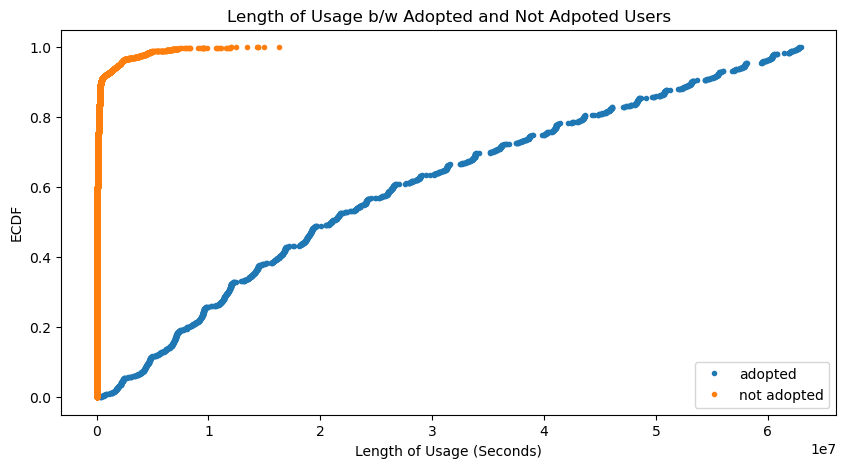

In [161]:
#set fig size
%matplotlib inline
plt.figure(figsize=(10,5))

x_active, y_active = ecdf(adopted)
x_inactive, y_inactive = ecdf(not_adopted)

plt.plot(x_active, y_active, marker='.', linestyle='none')
plt.plot(x_inactive, y_inactive, marker='.', linestyle='none')
plt.title('Length of Usage b/w Adopted and Not Adpoted Users')
plt.xlabel('Length of Usage (Seconds)')
plt.ylabel('ECDF')
plt.legend(['adopted', 'not adopted'])
plt.show()